In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("historical_yieldcurve.csv")
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2,2020-01-06,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
3,2020-01-07,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
4,2020-01-08,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2022-10-31,3.73,4.00,4.22,4.57,4.66,4.51,4.45,4.27,4.18,4.10,4.44,4.22
710,2022-11-01,3.72,4.00,4.23,4.58,4.75,4.54,4.48,4.27,4.18,4.07,4.37,4.14
711,2022-11-02,3.70,4.01,4.22,4.57,4.76,4.61,4.54,4.30,4.20,4.10,4.41,4.15
712,2022-11-03,3.75,4.04,4.25,4.57,4.78,4.71,4.63,4.36,4.26,4.14,4.42,4.18


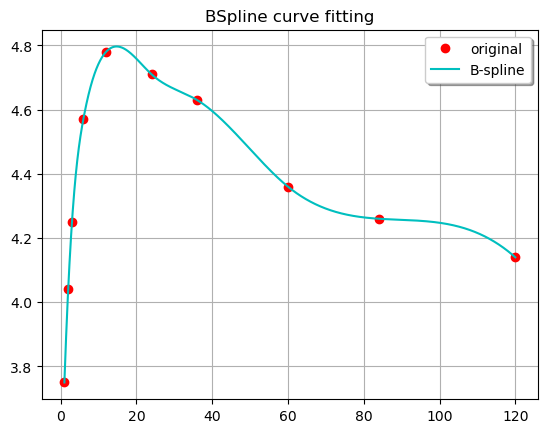

array([3.75      , 3.76089353, 3.77168465, 3.78237394, 3.792962  ,
       3.80344939, 3.81383672, 3.82412456, 3.83431349, 3.8444041 ])

In [69]:
from scipy import interpolate
from datetime import datetime


x = [1,2,3,6,12,24,36,60,84,120]
y = df.iloc[712,1:11].values

tck = interpolate.splrep(x, y, s=0, k=3) 
x_new = np.linspace(min(x), max(x), 3650)
y_fit = interpolate.BSpline(*tck)(x_new)
plt.title("BSpline curve fitting")
plt.plot(x, y, 'ro', label="original")
plt.plot(x_new, y_fit, '-c', label="B-spline")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [72]:
rate = []
for i in range(df.shape[0]):
    
    x = [1,2,3,6,12,24,36,60,84,120]
    y = df.iloc[i,1:11].values
    current_date = df.iloc[i,0].date()
    maturity_date = datetime.strptime("2023-08-02", '%Y-%m-%d').date()
    days_diff = (maturity_date-current_date).days
    
    tck = interpolate.splrep(x, y, s=0, k=3) 
    x_new = np.linspace(min(x), max(x), 10*365)
    y_fit = interpolate.BSpline(*tck)(x_new)
    rate.append(y_fit[days_diff])

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

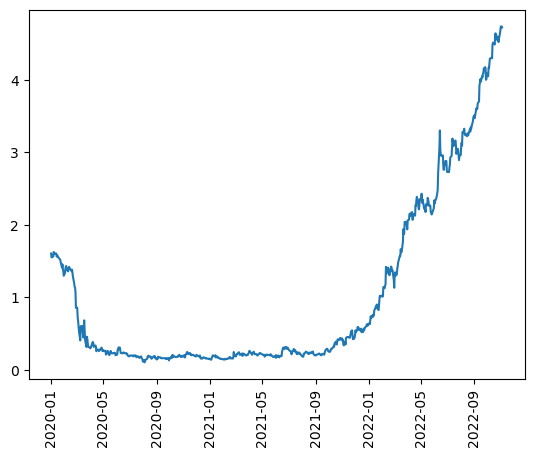

In [83]:
plt.plot(df.DATE,df.DTB3)
plt.xticks(rotation=90)

In [80]:
"""d = {'DATE': df.iloc[:,0] , 'DTB3': rate}
df = pd.DataFrame(data=d)
df.tail()
df.to_csv("ratefromYC.csv",index=False)"""